In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from IrisLocalization import iris_localization
from IrisNormalization import iris_normalization
from ImageEnhancement import image_enhancement
from FeatureExtraction import feature_extraction
from IrisMatching import dimension_reduction, iris_matching
from PerformanceEvaluation import generate_roc_curve, calc_crr, generate_crr_table

IMG_PATH = "./CASIA Iris Image Database (version 1.0)/"

/Users/fengyanglin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def load_dataset(img_folder=IMG_PATH):
    x_train_img = []
    y_train = []
    x_test_img = []
    y_test = []

    for i in range(1, 109):
        training_path = img_folder + str(i).zfill(3) + '/' + str(1) + '/'
        for j in range(1, 4):
            img_file_name = str(i).zfill(3) + f"_{1}_" + str(j) + ".bmp"
            img_color = cv2.imread(training_path + img_file_name)
            img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
            img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)
            x_train_img.append(img_gray)
            y_train.append(i)

    for i in range(1, 109):
        testing_path = img_folder + str(i).zfill(3) + '/' + str(2) + '/'
        for j in range(1, 5):
            img_file_name = str(i).zfill(3) + "_2_" + str(j) + ".bmp"
            img_color = cv2.imread(testing_path + img_file_name)
            img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
            img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)
            x_test_img.append(img_gray)
            y_test.append(i)
    return x_train_img, x_test_img, np.array(y_train), np.array(y_test)


def generate_features(x_img):
    x = []
    for i in range(len(x_img)):
        img_gray = x_img[i]
        pupil, iris = iris_localization(img_gray)
        rect = iris_normalization(img_gray, pupil, iris)
        rect_enhanced = image_enhancement(rect, img_gray)
        rect_roi = rect_enhanced[0:48, :]
        v = feature_extraction(rect_roi)
        x.append(v)
    return np.array(x)

In [ ]:
#fengyang
def generate_features(x_img):
    x = []
    for i in range(len(x_img)):
        img_gray = x_img[i]
        pupil, iris = iris_localization(img_gray)
        rect = iris_normalization(img_gray, pupil, iris)
        rect_enhanced = image_enhancement(img_gray, rect)
        rect_roi = rect_enhanced[0:48, :]
        v = feature_extraction(rect_roi)
        x.append(v)
    return np.array(x)

In [ ]:
from IrisLocalization import iris_localization
from IrisNormalization import iris_normalization
from ImageEnhancement import image_enhancement

In [ ]:
from fy_IrisLocalization import iris_localization
from fy_IrisNormalization import iris_normalization
from fy_ImageEnhancement import image_enhancement

# of training images: 324
# of testing images: 432
With l1 metric, CRR is 0.9305555555555556
With l2 metric, CRR is 0.9328703703703703
With cosine metric, CRR is 0.9282407407407407


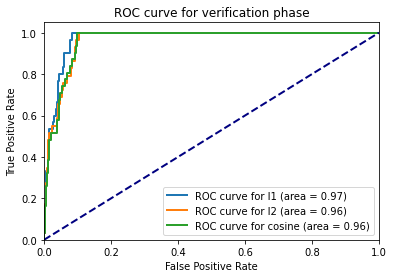

CPU times: user 1min 50s, sys: 6.8 s, total: 1min 57s
Wall time: 53.2 s


In [5]:
%%time
from fy_IrisLocalization import iris_localization
from fy_IrisNormalization import iris_normalization
from ImageEnhancement import image_enhancement

x_train_img, x_test_img, y_train, y_test = load_dataset()
print(f"# of training images: {len(x_train_img)}")
print(f"# of testing images: {len(x_test_img)}")

x_train, x_test = generate_features(x_train_img), generate_features(
    x_test_img)
x_train_lda, x_test_lda = dimension_reduction(x_train, x_test, y_train)

clfs, y_preds = iris_matching(x_train_lda, y_train, x_test_lda)

crr = calc_crr(y_preds, y_test)
generate_crr_table(crr)
generate_roc_curve(clfs, y_preds, x_test_lda, y_test)